Task 4.1 Supervised Learning - Regression 

In [2]:
# Importiere notwendige Bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

                biking   smoking  heartdisease
biking        1.000000  0.015136     -0.935455
smoking       0.015136  1.000000      0.309131
heartdisease -0.935455  0.309131      1.000000
Pearson-Korrelation zwischen biking und heartdisease: -0.9354554743738542
Pearson-Korrelation zwischen smoking und heartdisease: 0.3091309790873179
Pearson-Korrelation zwischen heartdisease und heartdisease: 0.9999999999999999


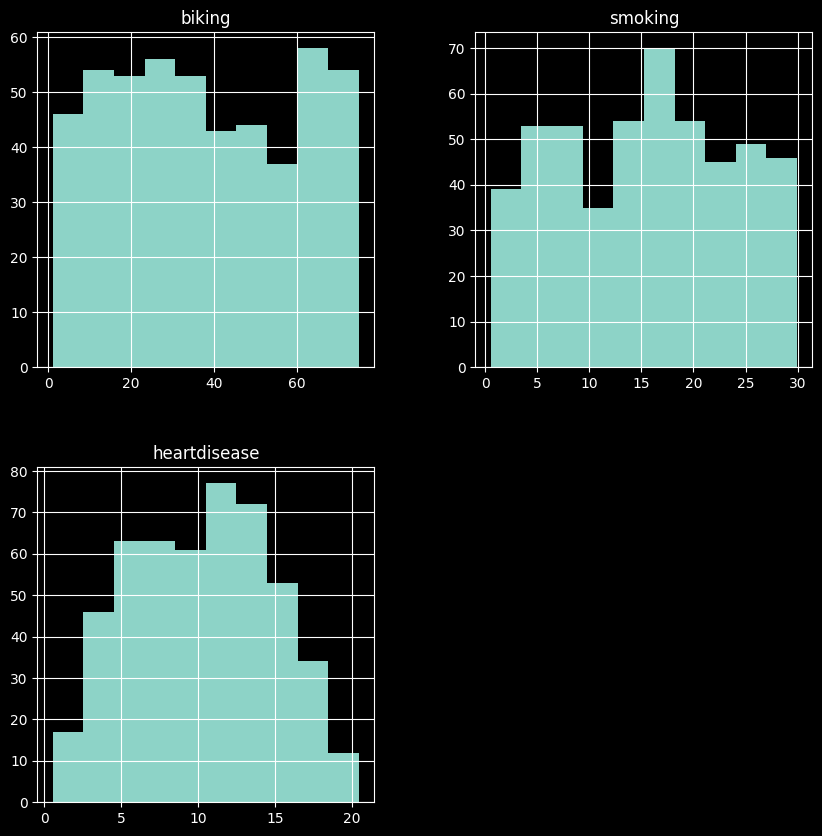

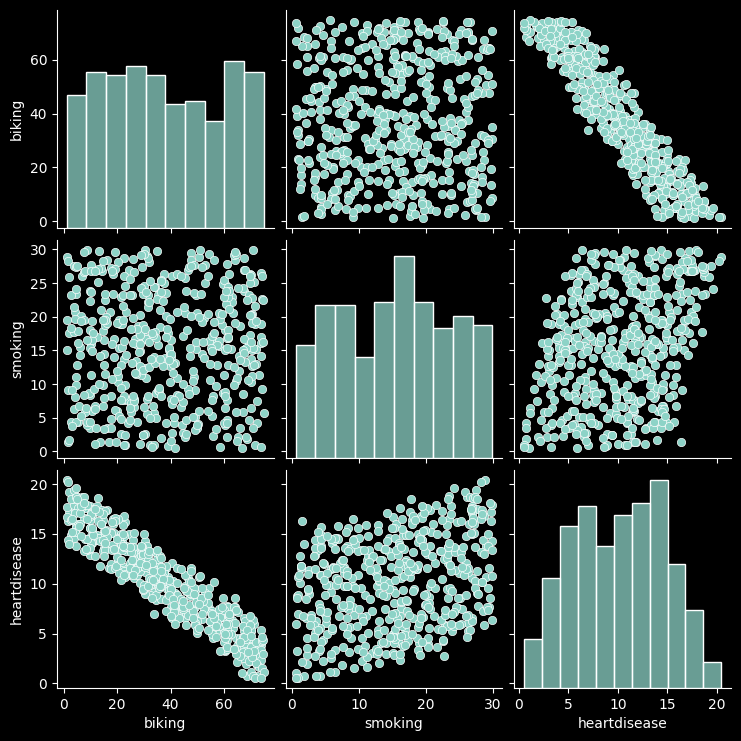

In [3]:
# 1. Lade das Dataset
df = pd.read_csv("C:\\Users\\sonja\\Downloads\\heartdata.csv", index_col=0)

# 2. Überprüfe Annahmen des linearen Regressionsmodells

# Korrelation der Variablen
corr_matrix = df.corr()
print(corr_matrix)

# Pearson-Korrelationstest
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        corr, _ = pearsonr(df[col], df['heartdisease'])  
        print(f"Pearson-Korrelation zwischen {col} und heartdisease: {corr}")

# Visualisiere Verteilungen der Variablen
df.hist(figsize=(10, 10))
plt.show()

# Visualisiere Beziehungen zwischen Variablen
sns.pairplot(df)
plt.show()


In [5]:
# 3. Lineare Regression anpassen
# Angenommen, 'heartdisease' ist das Ziel, und die restlichen Spalten sind Features
X = df.drop('heartdisease', axis=1)
y = df['heartdisease']

model = LinearRegression()
model.fit(X, y)


LinearRegression()

Koeffizienten: [-0.00048182 -0.19995132  0.17876734]
Schnittpunkt: 15.091314524288894
r²-Score: 0.9798460851683253


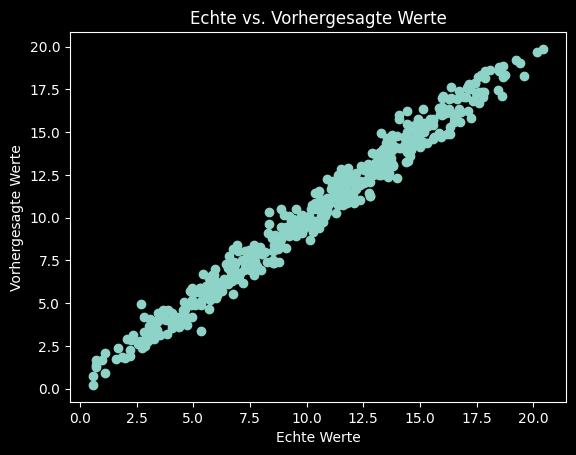

In [6]:
# 4. Modellbewertung
print("Koeffizienten:", model.coef_)
print("Schnittpunkt:", model.intercept_)

# Vorhersage und r²-Score
y_pred = model.predict(X)
print(f"r²-Score: {r2_score(y, y_pred)}")

# Visualisierung der Vorhersagen
plt.scatter(y, y_pred)
plt.xlabel('Echte Werte')
plt.ylabel('Vorhergesagte Werte')
plt.title('Echte vs. Vorhergesagte Werte')
plt.show()

In [7]:

# 5. Trainiere das Modell mit Cross-Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modell fitten
model.fit(X_train, y_train)

# Vorhersage auf Testdaten
y_test_pred = model.predict(X_test)

# r²-Score für Testdaten
print(f"r²-Score für Testdaten: {r2_score(y_test, y_test_pred)}")


r²-Score für Testdaten: 0.9750262916244133


# 6. Git-Update
# Diese Schritte müssen manuell im Terminal ausgeführt werden:
# git add .
# git commit -m "Linear Regression Analysis"
# git push